### 22a November

# Mer om MLP

- Dropout layer:
    - Man lägger in en chans att en nod slutar fungera för en epok, då måste resterande noder och vikter förhålla sig.
    - Väldigt effektivt!

In [1]:
import keras
from keras import layers, Sequential
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


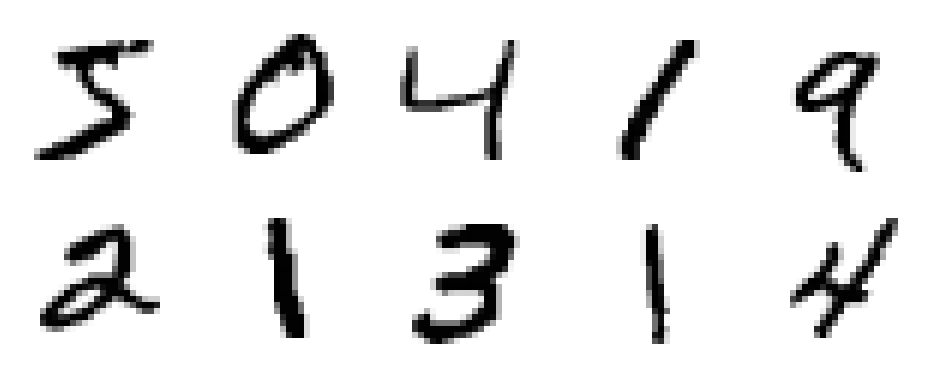

In [4]:
def display_images(data, nrows=2, ncols=5, figsize=(12,4)):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    for i, ax in enumerate(ax.flatten()):
        ax.imshow(data[i,:,:], cmap='binary')
        ax.axis('off')
    
    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)
    
display_images(X_train)

In [5]:
def make_model(nodes=None, names=None, activations=[], optimizer=None):
    model = Sequential(name="MLP")
    model.add(layers.Flatten(input_shape=(28, 28))) # samma sak som ett InputLayer!!
    
    for node, name, activation in zip(nodes, names, activations):
        model.add(layers.Dense(node, activation=activation, name=name))
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy']) # "sparse" är bra när det är fler än 1 output node. Alltså mer än sant/falskt.
    
    return model



In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)


model_naive = make_model(nodes=[10], names=["output"], activations=['softmax'], optimizer=optimizer)
model_naive.summary()

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.7963 - loss: 0.7825 - val_accuracy: 0.9137 - val_loss: 0.3099
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9087 - loss: 0.3276 - val_accuracy: 0.9213 - val_loss: 0.2788
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.9168 - loss: 0.2982 - val_accuracy: 0.9255 - val_loss: 0.2673
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9220 - loss: 0.2801 - val_accuracy: 0.9275 - val_loss: 0.2612
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.9217 - loss: 0.2746 - val_accuracy: 0.9297 - val_loss: 0.2588
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9260 - loss: 0.2660 - val_accuracy: 0.9312 - val_loss: 0.2562
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.9258 - loss: 0.2584 - val_accuracy: 0.9306 - val_loss: 0.2545
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9289 -

In [8]:
naive_history = pd.DataFrame(model_naive.history.history)
naive_history.index = range(len(naive_history))

naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86806,0.505999,0.9137,0.309926
1,0.91166,0.316193,0.9213,0.278795
2,0.91792,0.292673,0.9255,0.267315
3,0.92150,0.281261,0.9275,0.261238
4,0.92242,0.273978,0.9297,0.258790


In [9]:
def plot_metrics(df_history, style='-o'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    metrics = [['loss', 'val_loss'], ['accuracy', 'val_accuracy']]
    
    for ax, metrics in zip(ax, metrics):
        df_history.plot(ax=ax, style=style, y=metrics, xlabel='Epoch', ylabel=metrics, title=metrics[0])
    

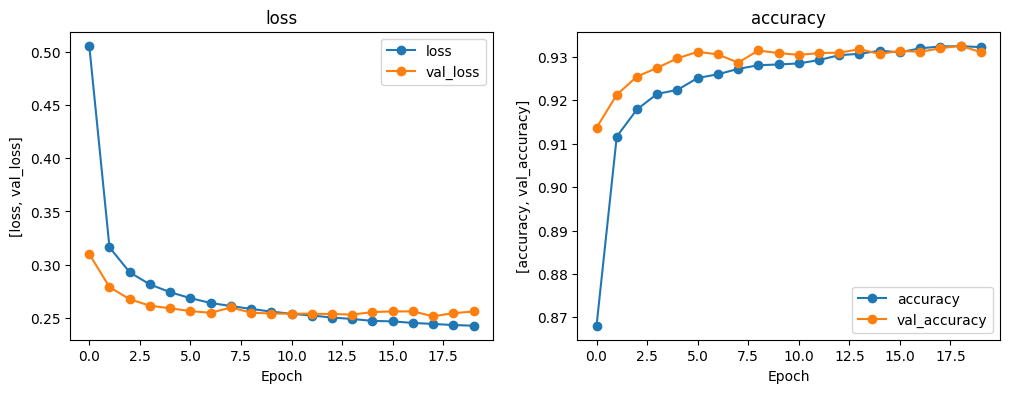

In [10]:
plot_metrics(naive_history)

<Axes: >

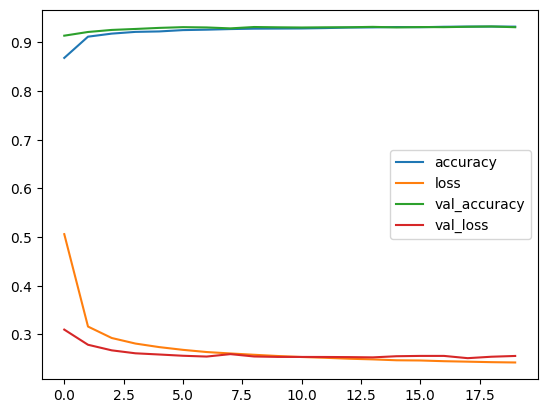

In [11]:
naive_history.plot()

In [19]:
model_deep = make_model(nodes=[128, 128, 10], names=["hidden1", "hidden2", "output"], activations=['relu', 'relu', 'softmax'], optimizer=optimizer)

model_deep.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

deep_history = pd.DataFrame(model_deep.history.history)
deep_history.index = range(len(deep_history))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.4436 - val_accuracy: 0.9663 - val_loss: 0.1134
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.1107 - val_accuracy: 0.9733 - val_loss: 0.0938
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0723 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0513 - val_accuracy: 0.9725 - val_loss: 0.0941
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0395 - val_accuracy: 0.9767 - val_loss: 0.0876
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9763 - val_loss: 0.0915
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9775 - val_loss: 0.0876
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0.0201 - 

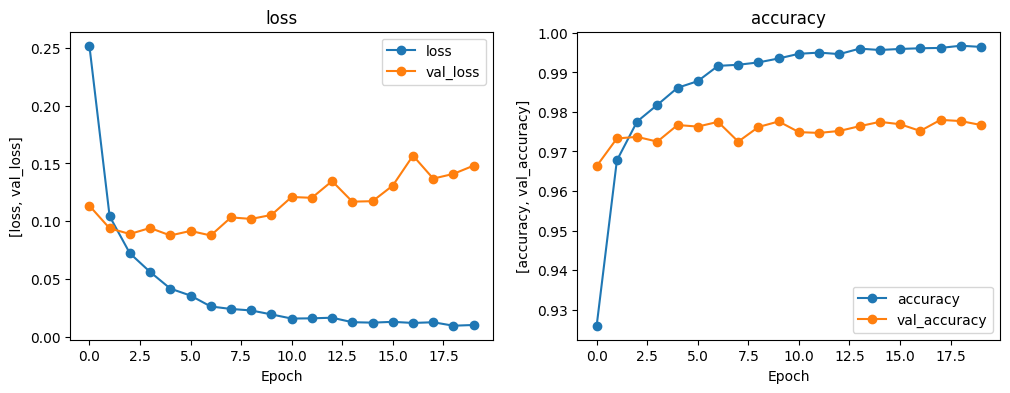

In [21]:
plot_metrics(deep_history)

In [22]:
model_deep.fit(X_train, y_train, epochs=2, verbose=1)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9930 - loss: 0.0308
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9964 - loss: 0.0125


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



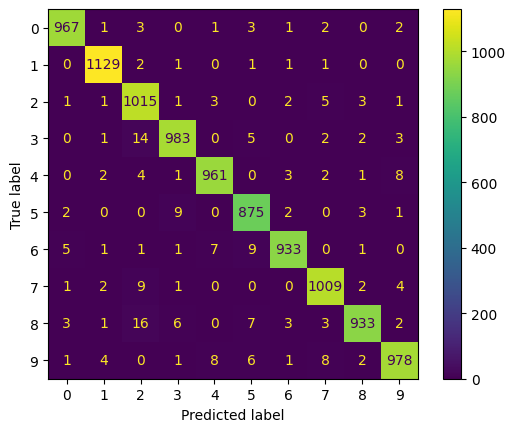

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test).argmax(axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

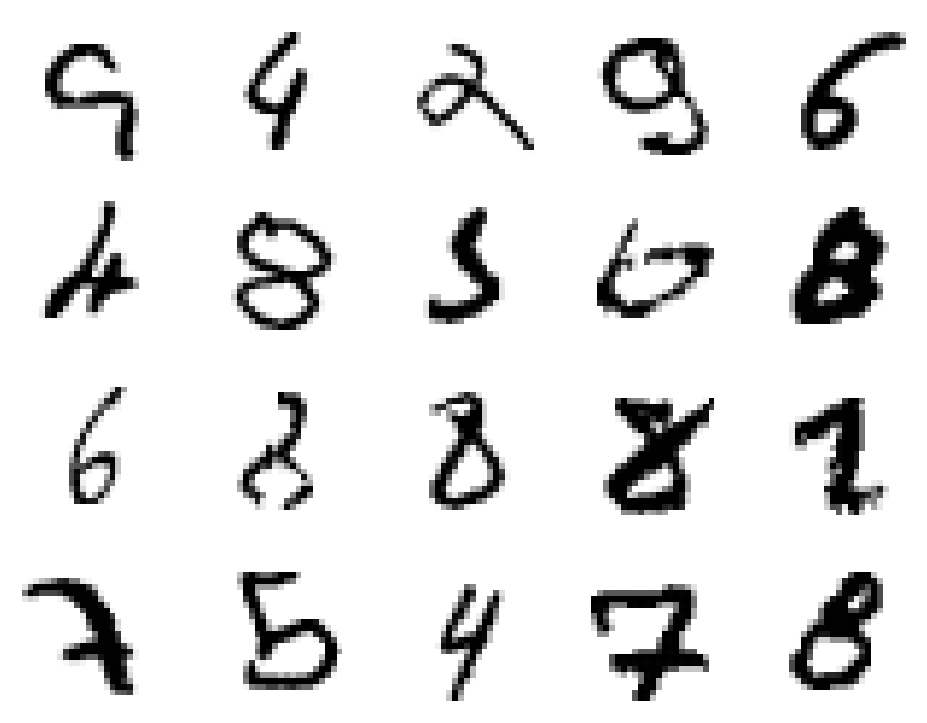

In [25]:
missclassified_id = np.where(y_test != y_pred)[0]
missclassified_samples = X_test[missclassified_id]

display_images(missclassified_samples, 4, 5, (12, 8))